In [3]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.optimizers import SGD, RMSprop
from keras.callbacks import EarlyStopping
from sklearn.utils import validation 
from sklearn import preprocessing
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import load_img, img_to_array
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential,preprocessing
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

In [4]:
 from google.colab import drive
drive.mount("/content/gdrive", force_remount = True)

Mounted at /content/gdrive


In [5]:
import warnings
warnings.filterwarnings('ignore')

In [6]:
model = Sequential()
model.add(Conv2D(128,(3,3),input_shape=(150,150,3),activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(32,(3,3),activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(128,activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(10,activation ='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 128)     3584      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 128)      0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 32)        36896     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 32)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 41472)             0         
                                                                 
 dense (Dense)               (None, 128)               5

In [7]:
%cd '/content/gdrive/MyDrive/TraiCay'

/content/gdrive/MyDrive/TraiCay


In [8]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale = 1./255,shear_range = 0.2,zoom_range = 0.2,horizontal_flip = True)
training_set = train_datagen.flow_from_directory('/content/gdrive/MyDrive/TraiCay/Training_set',target_size = (150,150),batch_size = 32,class_mode =  'categorical')

Found 721 images belonging to 10 classes.


In [9]:
test_set = train_datagen.flow_from_directory('/content/gdrive/MyDrive/TraiCay/Test_set',target_size = (150,150),batch_size = 32,class_mode =  'categorical')

Found 238 images belonging to 10 classes.


In [10]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [11]:
model.fit(training_set,epochs = 100,validation_data=test_set,verbose = 1)

Epoch 1/100
23/23 [==============================] - 292s 12s/step - loss: 2.4350 - accuracy: 0.1720 - val_loss: 2.0286 - val_accuracy: 0.1849
Epoch 2/100
23/23 [==============================] - 9s 409ms/step - loss: 1.9860 - accuracy: 0.2483 - val_loss: 1.8157 - val_accuracy: 0.3613
Epoch 3/100
23/23 [==============================] - 9s 404ms/step - loss: 1.8296 - accuracy: 0.3564 - val_loss: 1.6210 - val_accuracy: 0.4622
Epoch 4/100
23/23 [==============================] - 9s 406ms/step - loss: 1.7128 - accuracy: 0.4202 - val_loss: 1.5519 - val_accuracy: 0.4370
Epoch 5/100
23/23 [==============================] - 9s 404ms/step - loss: 1.5994 - accuracy: 0.4716 - val_loss: 1.2374 - val_accuracy: 0.5126
Epoch 6/100
23/23 [==============================] - 9s 405ms/step - loss: 1.3919 - accuracy: 0.5229 - val_loss: 1.1668 - val_accuracy: 0.5672
Epoch 7/100
23/23 [==============================] - 9s 406ms/step - loss: 1.3239 - accuracy: 0.5492 - val_loss: 1.0394 - val_accuracy: 0.6218

In [12]:
from keras.models import load_model
model.save('Final.h5')
model_CNN = load_model('Final.h5')

In [14]:
training_set.class_indices

{'Chuoi': 0,
 'Dau_tay': 1,
 'Luu': 2,
 'Nho_My': 3,
 'Thanh_long': 4,
 'Vai_thue': 5,
 'Vu_sua': 6,
 'Xoai': 7,
 'cherry': 8,
 'kiwi': 9}

array([5])

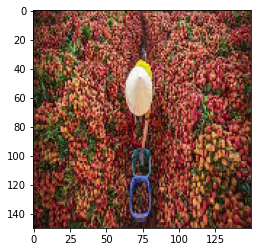

In [13]:
img = load_img('/content/gdrive/MyDrive/TraiCay/Test_set/Vai_thue/Vai (52).jpg',target_size=(150,150))
plt.imshow(img)
img=img_to_array(img)
img=img.reshape(1,150,150,3)
img=img.astype('float32')
img=img/255
np.argmax(model_CNN.predict(img),axis=1)

array([8])

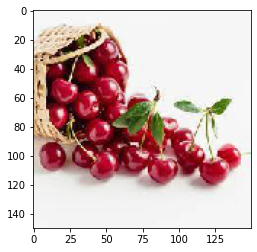

In [15]:
img = load_img('/content/gdrive/MyDrive/TraiCay/Test_set/cherry/(58).jpg',target_size=(150,150))
plt.imshow(img)
img=img_to_array(img)
img=img.reshape(1,150,150,3)
img=img.astype('float32')
img=img/255
np.argmax(model_CNN.predict(img),axis=1)

array([7])

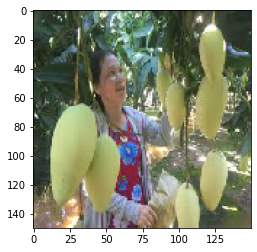

In [16]:
img = load_img('/content/gdrive/MyDrive/TraiCay/Test_set/Xoai/Xoai (72).jpg',target_size=(150,150))
plt.imshow(img)
img=img_to_array(img)
img=img.reshape(1,150,150,3)
img=img.astype('float32')
img=img/255
np.argmax(model_CNN.predict(img),axis=1)

array([3])

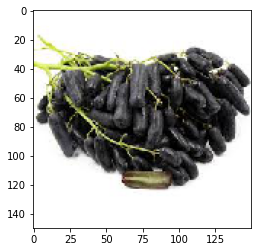

In [17]:
img = load_img('/content/gdrive/MyDrive/TraiCay/Test_set/Nho_My/Nho_My (38).jpg',target_size=(150,150))
plt.imshow(img)
img=img_to_array(img)
img=img.reshape(1,150,150,3)
img=img.astype('float32')
img=img/255
np.argmax(model_CNN.predict(img),axis=1)

In [21]:
from google.colab import drive
drive.mount('/content/gdrive')
!wget -nc https://raw.githubusercontent.com/brpy/colab-pdf/master/colab_pdf.py
from colab_pdf import colab_pdf
colab_pdf('TraiCay')

Mounted at /content/gdrive
shell-init: error retrieving current directory: getcwd: cannot access parent directories: Transport endpoint is not connected
pathconf: Transport endpoint is not connected
--2022-05-21 07:08:45--  https://raw.githubusercontent.com/brpy/colab-pdf/master/colab_pdf.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1864 (1.8K) [text/plain]
colab_pdf.py: Transport endpoint is not connected

Cannot write to ‘colab_pdf.py’ (Success).


ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py", line 2882, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-21-295147258cfb>", line 4, in <module>
    from colab_pdf import colab_pdf
  File "<frozen importlib._bootstrap>", line 983, in _find_and_load
  File "<frozen importlib._bootstrap>", line 963, in _find_and_load_unlocked
  File "<frozen importlib._bootstrap>", line 906, in _find_spec
  File "<frozen importlib._bootstrap_external>", line 1280, in find_spec
  File "<frozen importlib._bootstrap_external>", line 1249, in _get_spec
  File "<frozen importlib._bootstrap_external>", line 1213, in _path_importer_cache
OSError: [Errno 107] Transport endpoint is not connected

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py", line 1823, in showtraceba

OSError: ignored